In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
data = make_moons(n_samples=10000, noise=0.4)

In [3]:
X = data[0]
Y = data[1]

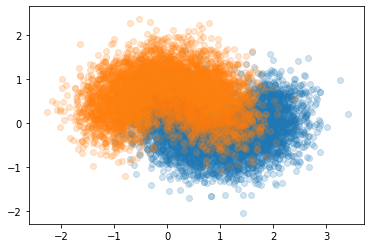

In [4]:
class1 = X[Y==1]
plt.scatter(class1[:,0],class1[:,1], alpha=0.2)
class0 = X[Y==0]
plt.scatter(class0[:,0],class0[:,1], alpha=0.2)

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [6]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, Y_train)
accuracy_score(Y_train, tree_clf.predict(X_train))

1.0

In [7]:
params = {"max_leaf_nodes":[i for i in range(2,100)]}
grid_search = GridSearchCV(tree_clf, params, cv=3, verbose=3, n_jobs=-1)
grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 182 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 294 out of 294 | elapsed:    1.2s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,


In [8]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=15,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [9]:
accuracy_score(Y_train,grid_search.predict(X_train))

0.858125

In [10]:
accuracy_score(Y_test,grid_search.predict(X_test))

0.8655

# Ex8

In [11]:
from sklearn.model_selection import ShuffleSplit

In [12]:
n_trees = 1000
n_samples = 100

s_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train)-n_samples)
for s_train_index, s_test_index in rs.split(X_train):
    s_sets.append((X_train[s_train_index], Y_train[s_train_index]))
    

In [13]:
from sklearn.base import clone
trees = [clone(grid_search.best_estimator_) for i in range(n_trees)]

scores = []
preds = []

for tree, (Xs,Ys) in zip(trees,s_sets):
    tree.fit(Xs, Ys)
    pred = tree.predict(X_test)
    preds.append(pred)
    scores.append(accuracy_score(Y_test, pred))

np.mean(scores)

0.8033790000000001

In [14]:
preds = np.array(preds)
final_preds = []
for i in range(len(X_test)):
    arr = preds[:, i]
    n0s = sum(arr == 0)
    n1s = sum(arr == 1)
    final_preds.append(1 if n1s>=n0s else 0)
    
print(accuracy_score(Y_test, final_preds))

0.87
